In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

Cali = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Magnetostriccion\calibracion.txt")
Fe = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Magnetostriccion\Hierro.txt")
Ni1 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Magnetostriccion\Ni1.txt")
Ni2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Magnetostriccion\Ni2.txt")
Ni3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Magnetostriccion\Ni3.txt")
Fe

,N,I1,I2,I3
0,0.00,0.09,0.11,0.05
1,0.50,0.25,0.25,0.28
2,1.00,0.49,0.42,0.52
3,1.50,0.60,0.55,0.71
4,1.75,0.87,0.71,0.89
5,2.00,1.03,0.94,1.95
6,2.25,1.15,1.94,1.86


In [4]:
#Obtener medidas de incertidumbre
#El r^2 de excel
def GetR2(x,y):
    matrix = np.corrcoef(x,y)
    R2 = (matrix[0,1])**2
    return R2

#Residuales 
#y es el de los datos
#ym es la de la regresion
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

#Regresión lineal
paramc,covc = np.polyfit(Cali['I'], Cali['B'], 1,cov=True)
_xc = np.linspace(min(Cali['I']),max(Cali['I']),len(Cali['I']))
m = paramc[0]
l_0 = paramc[1] 
ymc = m*_xc + l_0

R2c = GetR2(Cali['I'], Cali['B'])
resc = Residuals(Cali['B'],ymc)

error = np.sqrt(np.diag(covc))
error

array([0.26161256, 0.28864125])

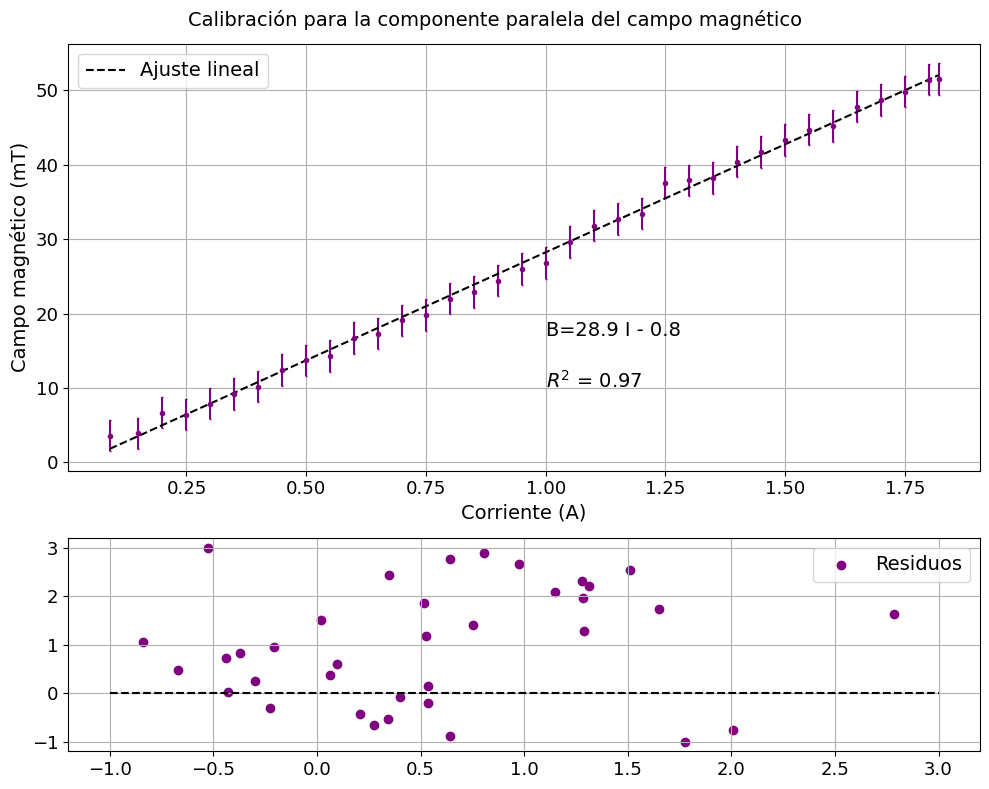

In [5]:
# #Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Calibración para la componente paralela del campo magnético',fontsize=14)

ax1.errorbar(Cali['I'], Cali['B'],color='purple',fmt='.',capsize=0.5,yerr=2.1)
ax1.plot(_xc,ymc,'--',color='k', label=r'Ajuste lineal')
ax1.set_ylabel(r"Campo magnético (mT)",fontsize=14)
ax1.set_xlabel(r'Corriente (A)',fontsize=14)
ax1.text(1, 17, r'B={} I - {}'.format(28.9,round(np.abs(l_0),1)),color='k',fontsize=14)
ax1.text(1, 10, r'$R^2$ = {}'.format(0.97),color='k',fontsize=14)
ax1.grid()
ax1.legend()
ax1.tick_params(axis='both',labelsize=13)
ax1.legend(fontsize=14)

xresc = np.linspace(-1,3,len(Cali['I']))
ax2.scatter(resc,xresc,label = 'Residuos',color='purple')
ax2.plot(xresc,np.zeros_like(xresc),'--',color='k')
ax2.grid()
ax2.legend()
ax2.tick_params(axis='both',labelsize=13)
ax2.legend(fontsize=14)

fig.tight_layout()
#plt.savefig('Calibracion.pdf')

In [30]:
#conversión de datos de campo

#Hierro
Fe1 = m*Fe['I1']
Fe2 = m*Fe['I2']
Fe3 = m*Fe['I3']
Fen = Fe['N']

#Niquel
Niq1 = m*Ni1['I1']
Niq1n = Ni1['N']
Niq2 = m*Ni2['I2']
Niq2n = Ni2['N']
Niq3 = m*Ni3['I3']
Niq3n = Ni3['N']

#Cobre
Cu = np.linspace(0,0.001,len(Fen))
#Cambio de longitud
def Deltal(N,li):
    Delta = []
    for i in range(len(N)):
        Delta.append((N[i]*632.9)/(2*li)*1e-3)
    return Delta

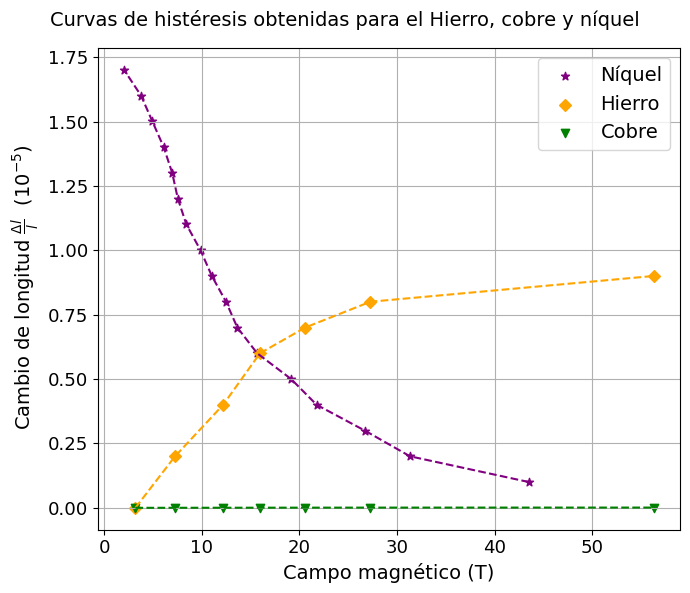

In [32]:
# #Gráfico con residuos
fig1, axis1 = plt.subplots(1,1, figsize = (7, 6))
ax1 = axis1

fig1.suptitle(r'Curvas de histéresis obtenidas para el Hierro, cobre y níquel',fontsize=14)

ax1.scatter(Niq3,Deltal(Niq3n,-l_0),color='purple', marker = "*", label=r'Níquel')
ax1.plot(Niq3,Deltal(Niq3n,-l_0),color='purple',linestyle='--')

ax1.scatter(Fe2,Deltal(Fen,-l_0),color='orange', marker = "D", label=r'Hierro')
ax1.plot(Fe2,Deltal(Fen,-l_0),color='orange',linestyle='--')

ax1.scatter(Fe2,Cu,color='green', marker = "v", label=r'Cobre')
ax1.plot(Fe2,Cu,color='green',linestyle='--')

ax1.set_xlabel(r"Campo magnético (T)",fontsize=14)
ax1.set_ylabel(r' Cambio de longitud $\frac{\Delta l }{l}$  $(10^{-5})$ ',fontsize=14)
ax1.grid()
ax1.legend()
ax1.tick_params(axis='both',labelsize=13)
ax1.legend(fontsize=14)

fig1.tight_layout()

#plt.savefig('Histeresis.pdf')